<a href="https://colab.research.google.com/github/ebrevdo/firearms_causes_of_death/blob/main/child_death_by_state_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
#!pip install us
#!pip install --force -U kaleido
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import plotly.express as px  
import us
import kaleido


In [69]:
!curl -o causes.csv https://raw.githubusercontent.com/ebrevdo/firearms_causes_of_death/main/Underlying%20Cause%20of%20Death%2C%201999-2020.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9921  100  9921    0     0  93594      0 --:--:-- --:--:-- --:--:-- 93594


In [70]:
causes_df = pd.read_csv('causes.csv', sep='\t', index_col=None)
causes_df = causes_df.loc[~causes_df.State.isna()]
name_to_abbr = {s.name: s.abbr for s in us.STATES}
causes_df['State Code'] = causes_df.State.apply(lambda s: name_to_abbr.get(s, ''))

In [71]:
# The "non-standard" means we count and normalize for ages 0-19 instead of
# separately splitting up into ages 0-9, 10-14, 15-24.  That's the "standard"
# approach by the CDC, but we only care about ages 0-19 here.
causes_df['Age Adjusted Rate'] = causes_df['Non-standard Age Adjusted Rate']
age_rate_min, age_rate_max = causes_df['Age Adjusted Rate'].describe()[['min', 'max']]
causes_df['Age Adjusted % Relative to Min'] = 100 * causes_df['Age Adjusted Rate'] / age_rate_min

In [72]:
fig = px.choropleth(
    causes_df,
    locations="State Code",
    color="Age Adjusted Rate",
    hover_name="State",
    color_continuous_scale='Bluered',
    locationmode = 'USA-states')
fig.update_layout(
    title_text = 'Child deaths by firearms per 100,000',
    geo_scope='usa',
)
fig.add_scattergeo(
    locations=causes_df['State Code'],
    locationmode='USA-states',
    text=causes_df['State Code'],
    mode='text')
fig.data[-1].update(textfont_color='white', textfont_size=10)
fig.show()
fig.write_image('child_deaths_by_firearms.png', scale=2)

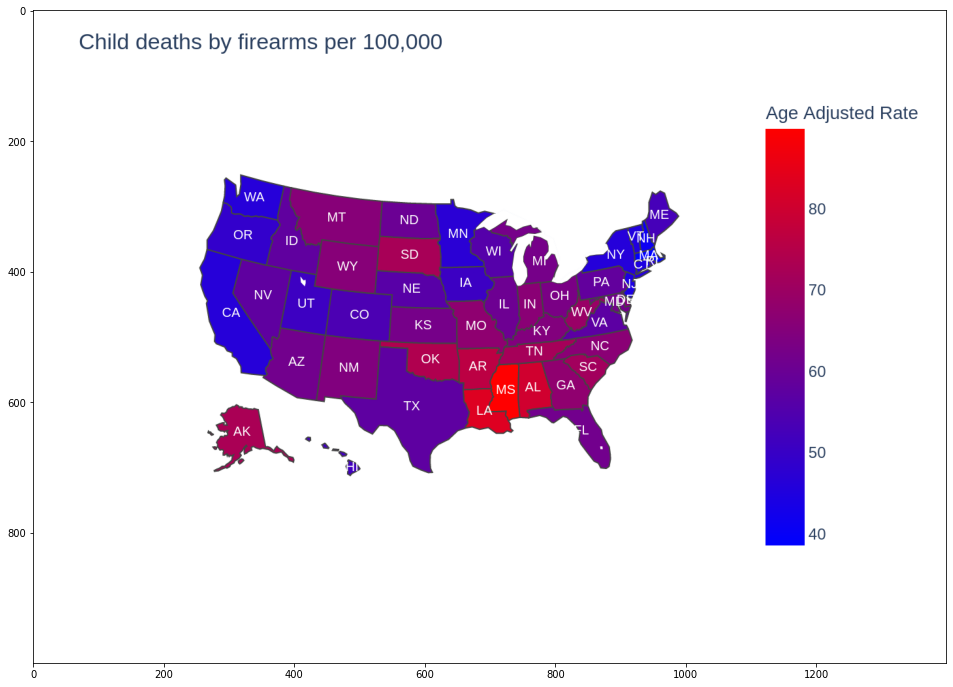

In [73]:
plt.figure(figsize=(24, 12))
plt.imshow(mpimg.imread('child_deaths_by_firearms.png'))